

# Data Preprocessing End-to-End Series

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section2)<br>

**2.** [**Problem Statement**](#Section2)<br>

**3.** [**Installing and Importing Libraries**](#Section3)<br>

**4.** [**Loading data using Pandas**](#Section4)<br>

**5.** [**Data Preprocessing**](#Section5)<br>

**6.** [**Data Exploration**](#Section6)<br>

---
<a name = Section2></a>
# **1. Introduction**
---


- **Data preprocessing** is a very important first step for anyone dealing with data sets. 

- It leads to better data sets, that are **cleaner** and are **more manageable**, a must for any business trying to get valuable information from the data it gathers.

- An **EDA** is a thorough examination meant to **uncover the underlying structure of a data set** and is **important** for a company because it **exposes trends**, **patterns**, and **relationships** that are not readily apparent.

---
<a name = Section2></a>
# **2. Problem Statement**
---

Due to the **boom** in the telecom industry with **4G technology**, it has become a pain in the neck for the company to **retain their customers**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Telecom/churn2.png"width="350" height="220"/></center>

- They are in the **middle** of setting up more **cell sites** on the **4G network** to improve their **4G services**.

-  It is **plausible** for customers to choose **4G services** over **3G services** due to benefits of **cost,speed, latency etc**.



- Till now they have been using manual traditional ways which now has become a problem to handle due to work complication.

<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-2/master/images/87217572-51866a00-c368-11ea-90b5-dd2e28fd00de.jpg"width="400" height="280"/></center>

- They have a detailed history of their customers and are looking for an automated solution toidentify the likeliness of customer churning from using their services.

- The data is **stored** in their **MongoDB** and you need to **extract to move further with your Data Science skills**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---


### **Installing Libraries**

In [1]:
# If pandas profiling gives an error, please update pandas-profiling by running this command in the comments below.

!pip install pandas-profiling --upgrade


### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

---
<a name = Section4></a>
# **4. Loading data using Pandas**
---

In [5]:
data = pd.read_csv("./churn.csv")
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---
<a name = Section5></a>
# **5. Data Preprocessing**
---

<a id=section501></a>
### **5.1 Description of the Dataset**

- The dataset contains all the necessary **information** about the **customers** like the **Gender, Tenure, InternetService, streamingTV, TotalCharges** etc.


- Also included in the dataset is the column **Churn** which classifies whether the customers will **Churn or not**

| Column Name        | Description                                               |
| -------------      |:-------------                                            :| 
| CustomerID         | Customer Identity                                        |   
| Tenure             | Number of months the customer has stayed with the company                                          |
| PhoneService       | Whether the customer has a phone service or not (Yes, No) |
| Contract           | The contract term of the customer (Month-to-month, One year, Two year)                                       |
| PaperlessBilling   | Whether the customer has paperless billing or not (Yes, No)                                       |
| PaymentMethod      | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))                                       |
| MonthlyCharges     | The amount charged to the customer monthly                                       |
| TotalCharges       | The total amount charged to the customer                                       |
| Churn              | Whether the customer churned or not (Yes or No)                                       |


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB


- ```info``` function gives us the following insights into the data:

  - The data has **7043 samples (rows)** and **9 columns**.
  
  - There are **3 columns** with a **numeric** datatype and **6 columns** with an **object** datatype.
  
  - There are **11 missing** values in the TotalCharges column.

In [7]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


- ```describe``` function gives us the following insights into the data:
  
  - The distribution of **MonthlyCharges** is **Normal** because the **difference** between the **mean** of **MonthlyCharges (about 65)** and **median (about 70)** is not huge, on a **distribution plot**. 
  
  - The **max** value of **MonthlyCharges** is **118**.
  
  - No **outliers** are present

<a id=section502></a>
### **5.2 Pandas Profiling before Data Preprocessing**

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __bd_train_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [8]:
# Performing pandas profiling before data preprocessing.
profile = ProfileReport(data, title='Pandas Profiling before Data Preprocessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [9]:
profile.to_file("data_train_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing on Train Set** <br><br>
__Dataset info__:
- **Number of variables**: 9
- **Number of observations**: 7043
- **Missing cells**: (< 0.1%)


__Variables types__: 
- **Numeric** = 3
- **Categorical** = 3
- **Boolean** = 3 

<br>


- **CustomerID** has **unique values**

- **Tenure** has a minimum value as **0**




---
<a name = Section6></a>
# **6. Data Exploration**
---


<a id=section401></a>
### **6.1 Data Preprocessing**

In [9]:
data.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#checking for unique values
print(data.nunique())

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [11]:
#Let's look at data where tenure is zero
data[data["tenure"] == 0]

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,0,Yes,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,0,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,0,Yes,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,0,Yes,Two year,No,Mailed check,73.35,NaN,No


__Observations__

- Only **11 observations have tenure = 0**, meaning they have recently joined as a customer.

- Even the **missing value** of **TotalCharges** are present here, confirming that they have recently started with the product.

- Churn for all of them is **'NO'**

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

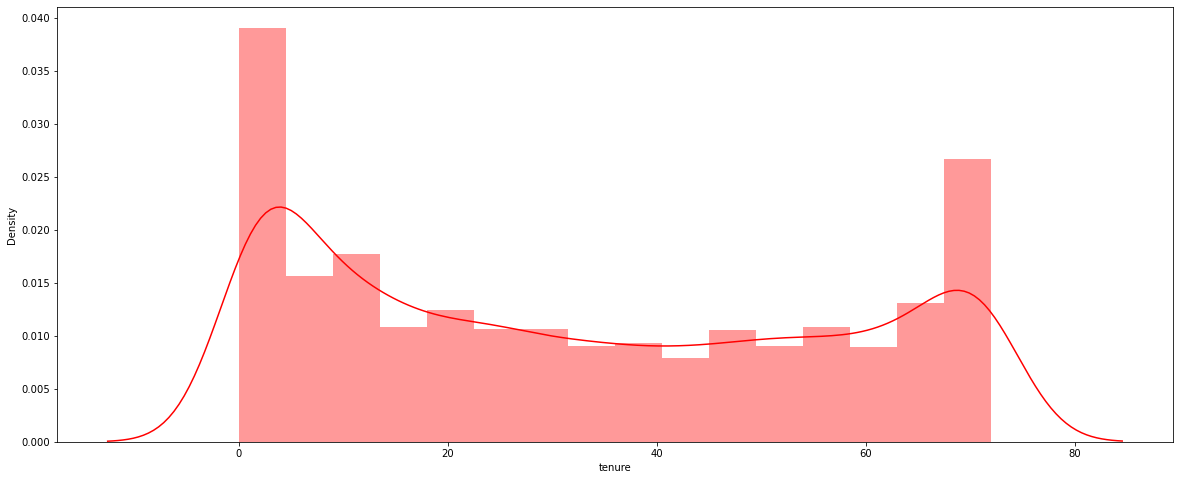

In [12]:
plt.figure(figsize=(20,8))
sns.distplot(data.tenure, color = "red")

In [13]:
#Lets replace tenure having 0 values with the mean since there are no extreme values
data["tenure"] = data["tenure"].replace(0,data["tenure"].mean())

In [14]:
data.select_dtypes(include=object).columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')

- We will **drop** the **customerID** column as it is **highly cardinal** and will **not add any value** to the model.

In [15]:
data.drop("customerID", axis = 1, inplace = True)

In [16]:
cols = data.select_dtypes(include=object).columns

from sklearn.preprocessing import LabelEncoder
label_encoded_train = data.copy()
#Label Encoding
le = LabelEncoder()
for i in cols:
    label_encoded_train[i] = le.fit_transform(label_encoded_train[i])

In [17]:
data_train = label_encoded_train.copy()
data_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0,0,1,2,29.85,29.85,0
1,34.0,1,1,0,3,56.95,1889.50,0
2,2.0,1,0,1,3,53.85,108.15,1
3,45.0,0,1,0,0,42.30,1840.75,0
4,2.0,1,0,1,2,70.70,151.65,1


In [18]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   float64
 1   PhoneService      7043 non-null   int32  
 2   Contract          7043 non-null   int32  
 3   PaperlessBilling  7043 non-null   int32  
 4   PaymentMethod     7043 non-null   int32  
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   int32  
dtypes: float64(3), int32(5)
memory usage: 302.8 KB


<a id=section602></a>
### **6.2 Exploratory Data Analysis**

<a id=section60201></a>
#### 6.2.1 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __abalone_train_after_preprocessing.html__.

In [19]:
# Performing pandas profiling after data preprocessing.
profile = ProfileReport(data_train, title='Pandas Profiling after Data Preprocessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [21]:
profile.to_file(output_file="data_train_after_preprocessing.html")

**Observations from Pandas Profiling after Data Processing**

<br> 

__Dataset info__:
- Number of variables: 9
- Number of observations: 7043
- Missing cells: (< 0.1%)


__Variables types__: 
- Numeric = 3
- Categorical = 5


<a id=section60202></a>
#### 6.2.2 Plotting the distribution of Churn

Text(0, 0.5, 'Churn')

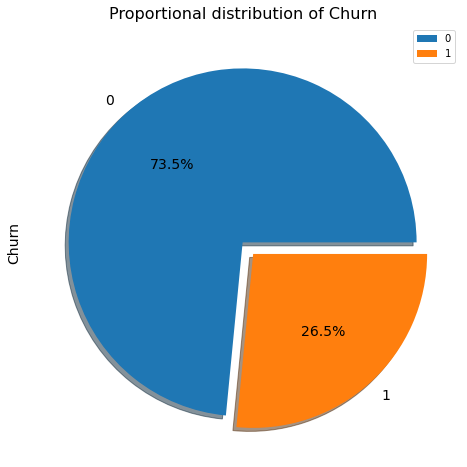

In [22]:
# Plotting our dependent variable, y column

data_train['Churn'].value_counts().plot(kind='pie', legend=True,explode = [0, 0.09], autopct = "%3.1f%%", shadow = True, figsize=(8,8), fontsize=14)

plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn', fontsize=14)

__Observation__

- From the above __Pie chart__, we can infer that the dataset is a __imbalanced dataset__.
- Customers who stayed with the company are __73%__(subscribed) and who left the company are __27%__(unsubscribed).

What is the relation between PhoneService and TotalCharges with respect to Churn?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


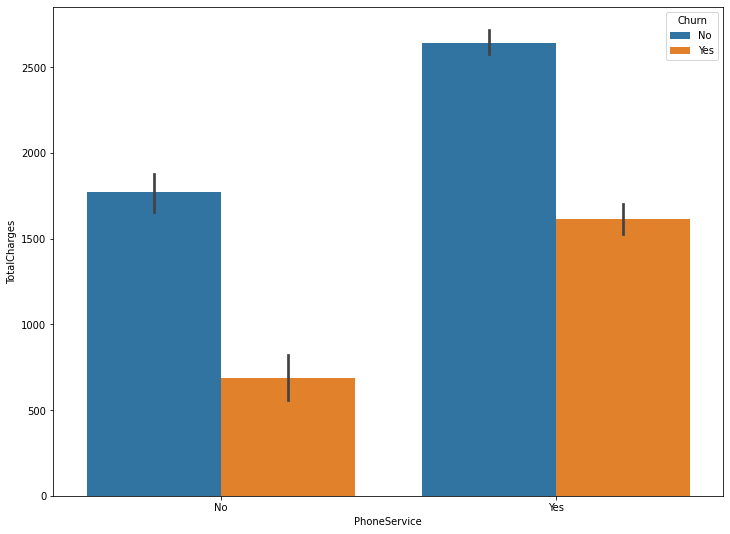

In [23]:
plt.figure(figsize=(12, 9))
sns.barplot(data['PhoneService'], data['TotalCharges'], hue = data['Churn'])

__Observations__

- More people with **Active Phone Service** have Churned.

- People with **No Phone Service** have churned less.

In [24]:
print(f"{len(data[data['PhoneService'] == 'Yes'])} have active PhoneService, which means -->")
print(f"1. {round((len(data[data['PhoneService'] == 'Yes'])/len(data))*100, 2 )} % customers have Active Phone Service.")
print(f"2. {round((len(data[(data['PhoneService']=='Yes') & (data['Churn']=='Yes')]))/(len(data[data['PhoneService']=='Yes']))*100,2)} % of customers with Active Phone Sevice have Churned.")

6361 have active PhoneService, which means -->
1. 90.32 % customers have Active Phone Service.
2. 26.71 % of customers with Active Phone Sevice have Churned.


In [25]:
print(f"{len(data[data['PhoneService'] == 'No'])} have active PhoneService, which means -->")
print(f"1. {round((len(data[data['PhoneService'] == 'No'])/len(data))*100, 2 )} % customers have Deactivated Phone Service.")
print(f"2. {round((len(data[(data['PhoneService']=='No') & (data['Churn']=='Yes')]))/(len(data[data['PhoneService']=='Yes']))*100,2)} % of customers with Deactivated Phone Sevice have Churned.")

682 have active PhoneService, which means -->
1. 9.68 % customers have Deactivated Phone Service.
2. 2.67 % of customers with Deactivated Phone Sevice have Churned.


What is the realtion between PaymentMethod and Churn?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


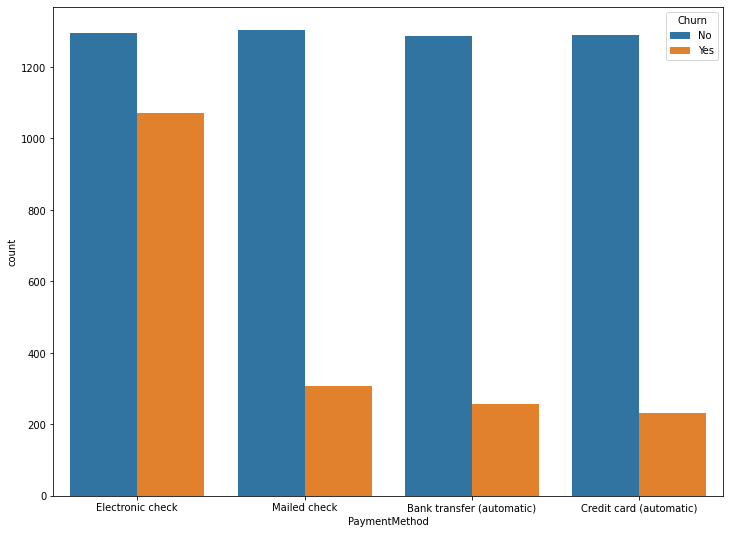

In [26]:
plt.figure(figsize=(12, 9))
sns.countplot(data['PaymentMethod'], hue = data['Churn'])

In [27]:
data[data['Churn'] == 'Yes']['PaymentMethod'].value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

Distribution of PaymentMethod where people Churned.

Text(0, 0.5, 'Churn')

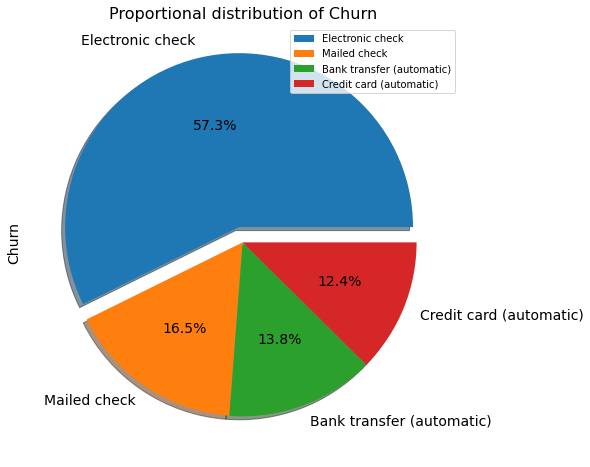

In [28]:
data[data['Churn'] == 'Yes']['PaymentMethod'].value_counts().plot(kind='pie', explode = [0.09, 0, 0, 0], legend=True, autopct = "%3.1f%%", shadow = True, figsize=(8,8), fontsize=14)

plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn', fontsize=14)

__Observations__

- People with **Electronic checks Churned** the most.

Distribution of PaymentMethod where people did not churn.

Text(0, 0.5, 'Churn')

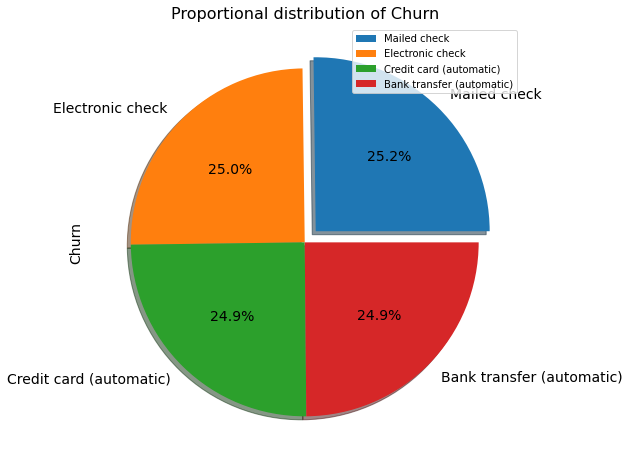

In [29]:
data[data['Churn'] == 'No']['PaymentMethod'].value_counts().plot(kind='pie', explode = [0.09, 0, 0, 0], legend=True, autopct = "%3.1f%%", shadow = True, figsize=(8,8), fontsize=14)

plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn', fontsize=14)

What is the correlation between the features?

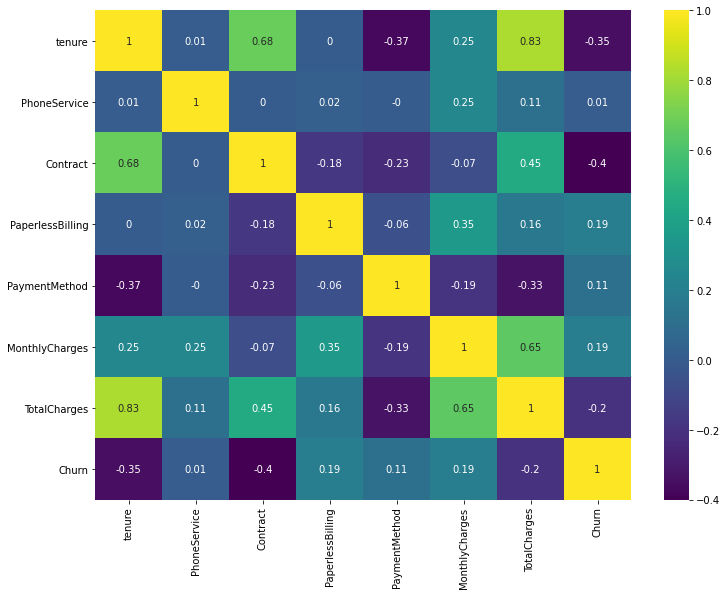

In [30]:
corr_mat = label_encoded_train.corr().round(2)
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

__Observations__

- __Tenure__ is more positively correlated with __Total Charges and MonthlyCharges__.

Let's Check if the columns tenure and Monthlycharges makes up the total charges columns!

In [31]:
label_encoded_train['product_of_tenure_MonthCharges'] = label_encoded_train['tenure'] * label_encoded_train['MonthlyCharges']
label_encoded_train[['product_of_tenure_MonthCharges','TotalCharges']].corr()

,product_of_tenure_MonthCharges,TotalCharges
product_of_tenure_MonthCharges,1.00000,0.99956
TotalCharges,0.99956,1.00000


__Observations__

- **TotalCharges** can be derived from the product of the tenure and MonthlyCharges.

- We can drop **TotalCharges** as that will not result in much information loss.

In [32]:
label_encoded_train.drop(['product_of_tenure_MonthCharges','TotalCharges'], axis = 1, inplace = True)

In [33]:
label_encoded_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1.0,0,0,1,2,29.85,0
1,34.0,1,1,0,3,56.95,0
2,2.0,1,0,1,3,53.85,1
3,45.0,0,1,0,0,42.30,0
4,2.0,1,0,1,2,70.70,1


In [34]:
label_encoded_train.to_csv("Cleaned_Churn.csv")